# Unidade 1 Trabalho 5 - Mobilidade ao entorno da UFRN

Imaginem que você quer avaliar a mobilidade no entorno da UFRN, em Natal/RN
- Quais bairros analisar?
- Onde eu poderia colocar dock-station(s) de compartilhamento de bicicletas?
- Desconsidere paradas de ônibus.

## Requisito 1
Usar na solução as métricas de centralidade vistas em sala, e imagens da rede destacadas pelas métricas.
- Centralidade de Grau: Número de conexões
- Centralidade de proximidade : Distância média para todos os outros vértices
- Centralidade de intermediação : Posição no caminho mais curto (intermediação)
- Centralidade de autovetor: Pontuação de autoridade com base na pontuação dos vizinhos

In [6]:
%pip install osmnx networkx
%pip install scipy seaborn

Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 6.7 MB/s eta 0:00:02
   -------------------------------------- - 7.6/7.8 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 22.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 49.0 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any

In [7]:
import osmnx as ox
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import scipy

### Rede (Candelária + Capim Macio + Lagoa Nova - UFRN)

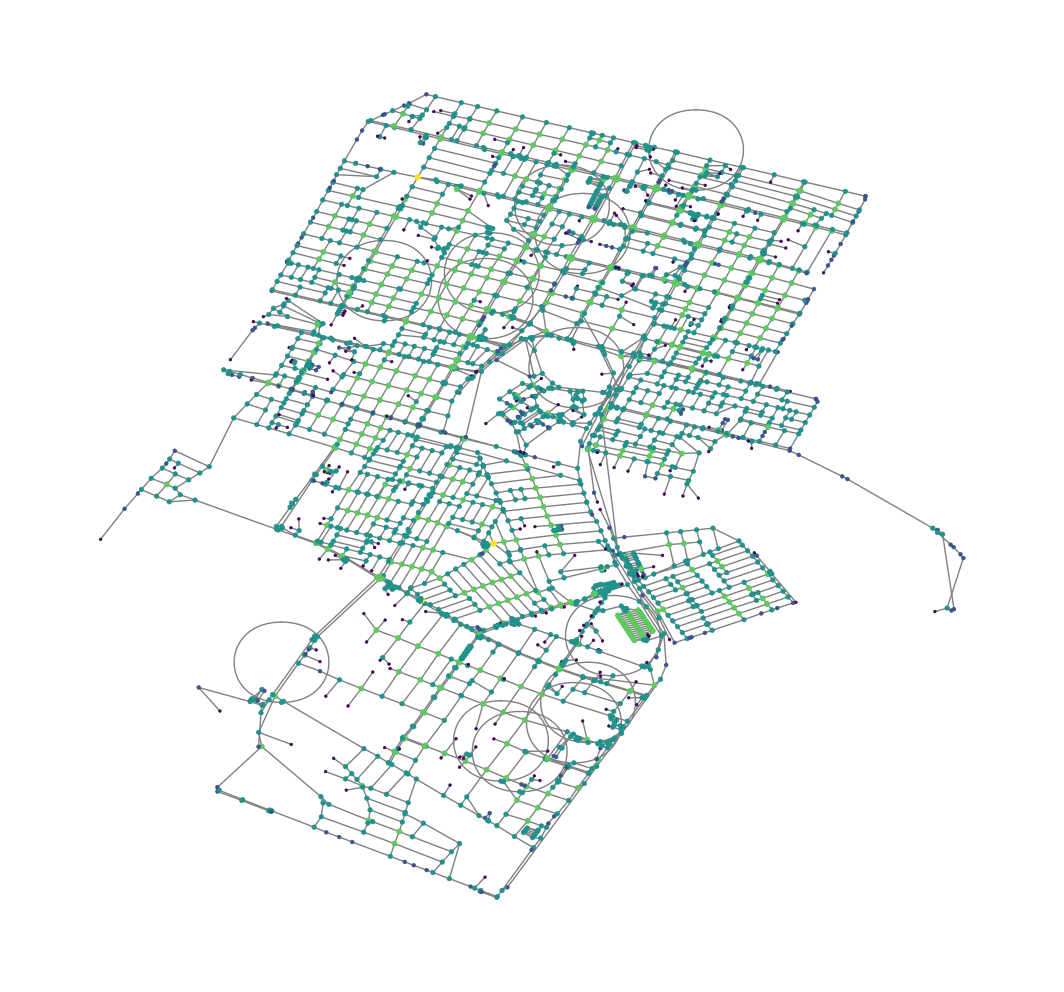

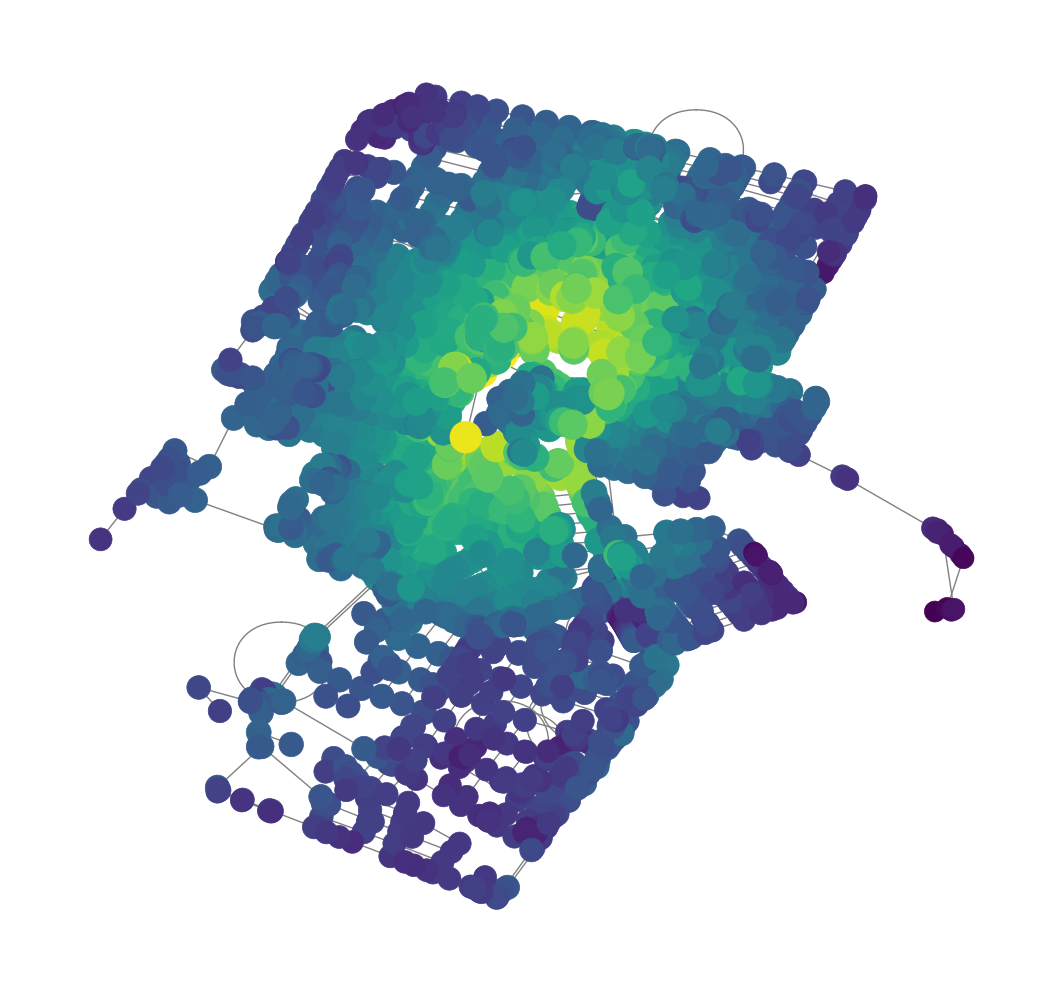

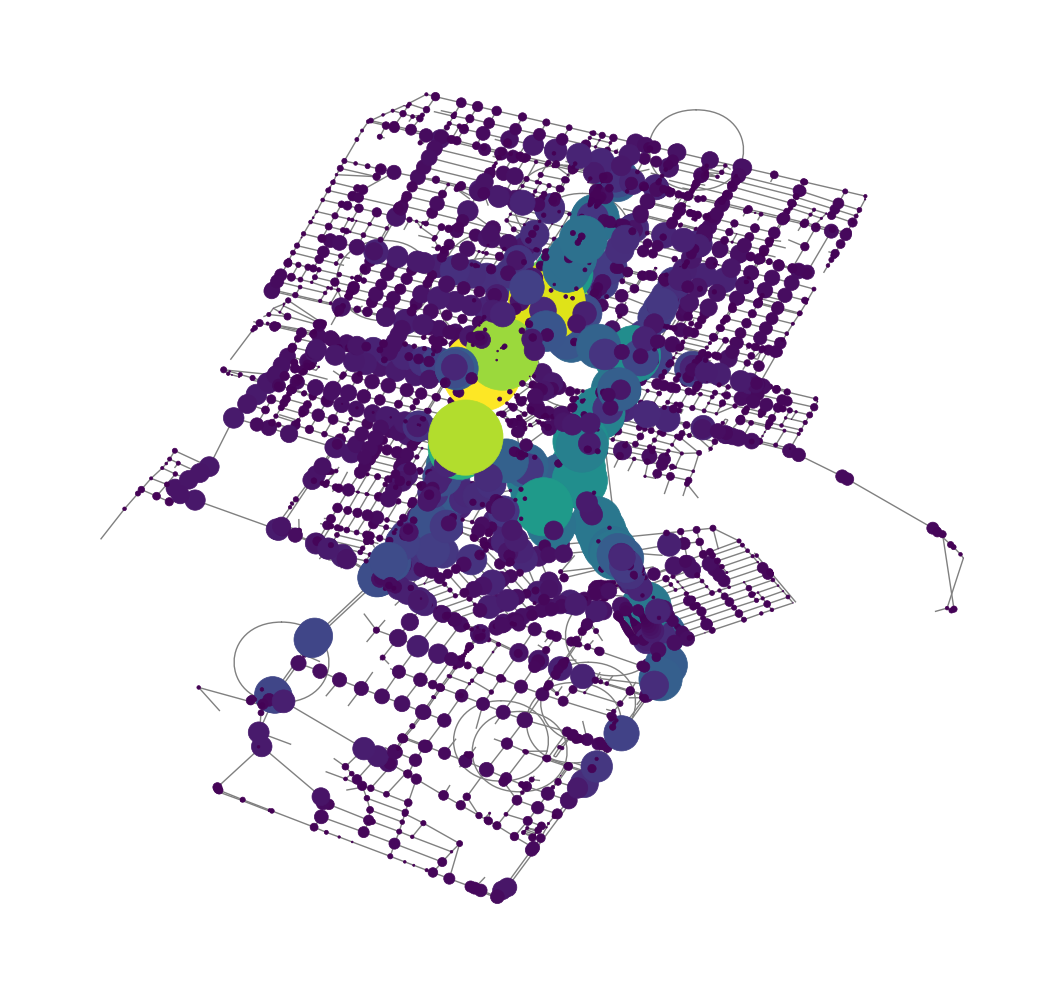

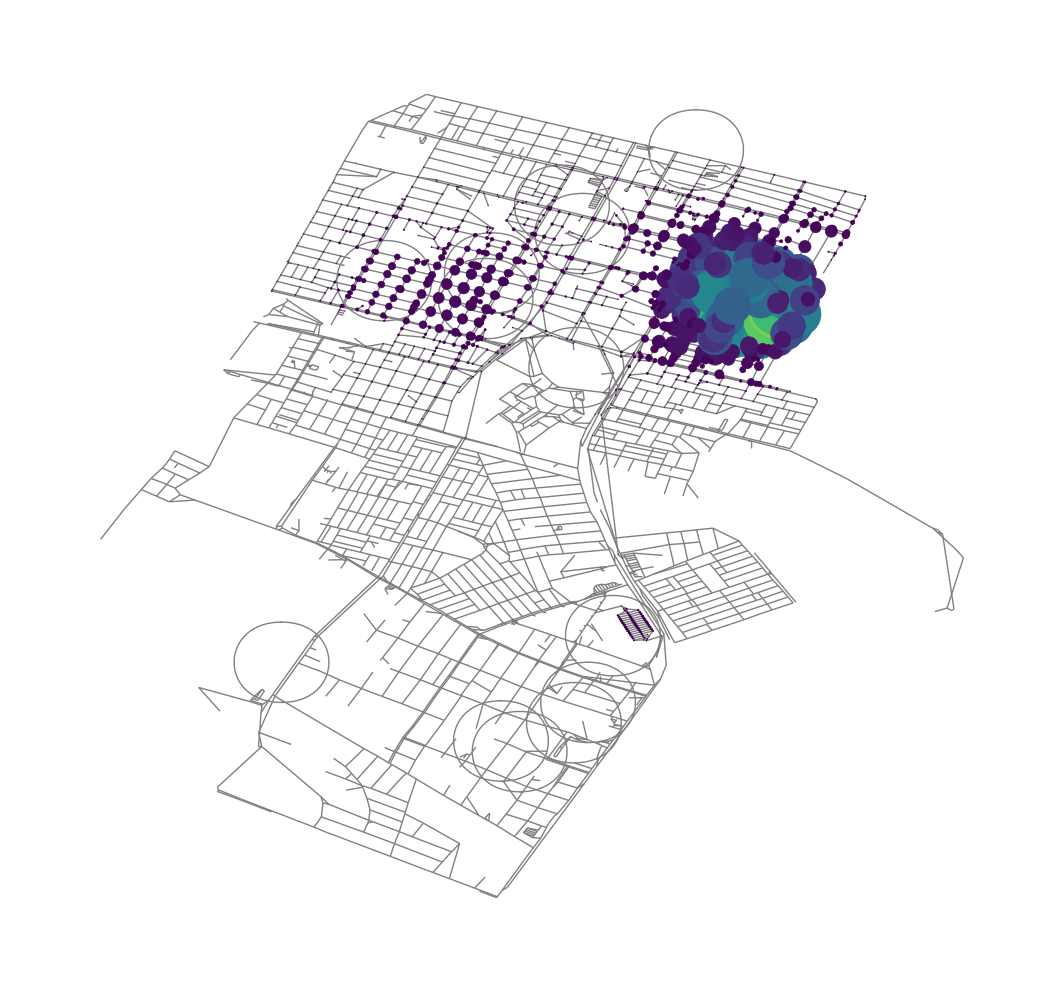

In [27]:
# Defina o nome do lugar ou as coordenadas
place_name = "Candelária, Natal, Brazil"
G_candelaria = ox.graph_from_place(place_name, network_type='bike')

# Você pode fazer o mesmo para Mirassol
place_name = "Mirassol, Natal, Brazil"
G_mirassol = ox.graph_from_place(place_name, network_type='bike')


# SUBTRAIR OS DOIS ABAIXO
# Defina o nome do lugar ou as coordenadas
place_name = "Lagoa Nova, Natal, Brazil"
G_lagoa = ox.graph_from_place(place_name, network_type='bike')

# Defina o nome do lugar ou as coordenadas
place_name = "Universidade Federal do Rio Grande do Norte, Natal, Brazil"
G_ufrn = ox.graph_from_place(place_name, network_type='bike')

# Crie uma cópia do grafo G1
G_lagoa_semuf = G_lagoa.copy()

# Remover nós de G_result que estão em G2
nodes_to_remove = list(G_ufrn.nodes())
G_lagoa_semuf.remove_nodes_from(nodes_to_remove)

# Alternativamente, para remover as arestas
edges_to_remove = list(G_ufrn.edges())
G_lagoa_semuf.remove_edges_from(edges_to_remove)

G1 = nx.compose(G_candelaria, G_mirassol)

G = nx.compose(G1, G_lagoa_semuf)

# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# 2. Calcular as métricas de centralidade com ajuste em `eigenvector_centrality`
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True)

# Centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# 3. Adicionar as métricas como atributos de cada nó (se convergiu)
nx.set_node_attributes(G_simple, degree_centrality, 'degree')
nx.set_node_attributes(G_simple, closeness_centrality, 'closeness')
nx.set_node_attributes(G_simple, betweenness_centrality, 'betweenness')

if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# 4. Função para plotar a rede com destaque para uma métrica
def plot_graph_with_centrality(G, centrality, title, filename):
    fig, ax = plt.subplots(figsize=(12, 12))
    node_colors = [centrality[node] for node in G.nodes if node in centrality]
    node_size = [v * 10000 for v in node_colors]  # Escala para visualização

    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    nx.draw(
        G,
        pos,
        ax=ax,
        node_color=node_colors,
        node_size=node_size,
        with_labels=False,
        edge_color="gray",
        cmap=plt.cm.viridis,
        vmin=min(node_colors),
        vmax=max(node_colors),
    )
    plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')  # Ajuste dpi conforme necessário
    plt.show()

# 5. Plotar a rede com as diferentes métricas de centralidade
plot_graph_with_centrality(G_simple, degree_centrality, 'Centralidade de Grau\nNúmero de conexões', 'Centralidade_de_Grau.png')
plot_graph_with_centrality(G_simple, closeness_centrality, 'Centralidade de Proximidade\nDistância média para todos os outros vértices', 'Centralidade_de_Proximidade.png')
plot_graph_with_centrality(G_simple, betweenness_centrality, 'Centralidade de Intermediação\nPosição no caminho mais curto', 'Centralidade_de_Intermediação.png')

if 'eigenvector_centrality' in locals():
    plot_graph_with_centrality(G_simple, eigenvector_centrality, 'Centralidade de Autovetor\nPontuação de autoridade baseada na pontuação dos vizinhos', 'Centralidade_de_Autovetor.png')


## Requisito 2
Para UFRN + Outros bairros

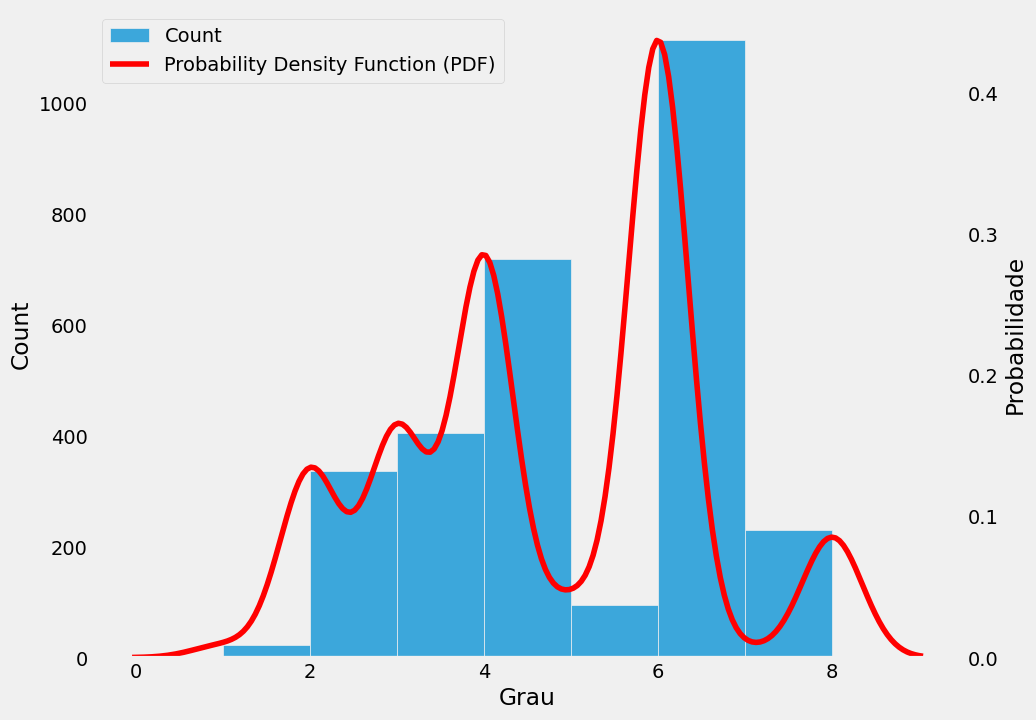

In [31]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('funcao_densidade_probabilidade.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

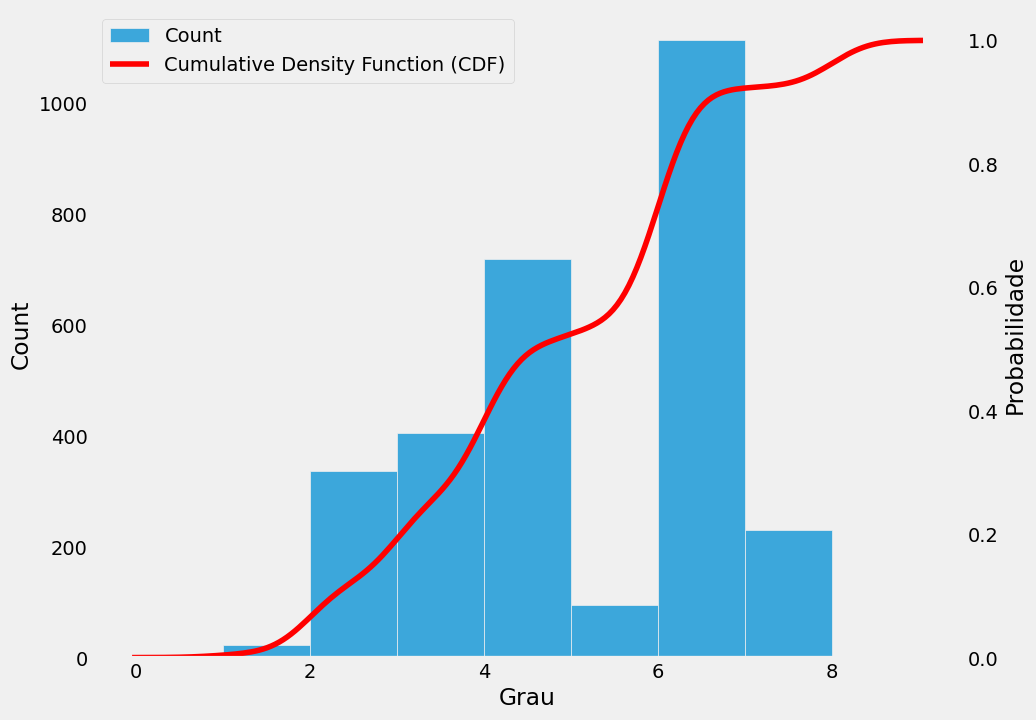

In [30]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('funcao_densidade_cumulativa.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Requisito 3

Para realizar uma análise multivariada das métricas de centralidade que você calculou (centralidade de grau, proximidade, intermediação e autovetor), você pode usar a biblioteca `seaborn` para visualizar as relações entre essas métricas através de um gráfico de pares (PairGrid). Primeiro, você precisará compilar essas métricas em um DataFrame do `pandas` para que possam ser usadas com `seaborn`.

Aqui está um exemplo de como você pode fazer isso e, em seguida, gerar um gráfico de pares:

Crie um DataFrame com as métricas de centralidade.
Utilize `seaborn.PairGrid` para visualizar as relações entre as métricas.

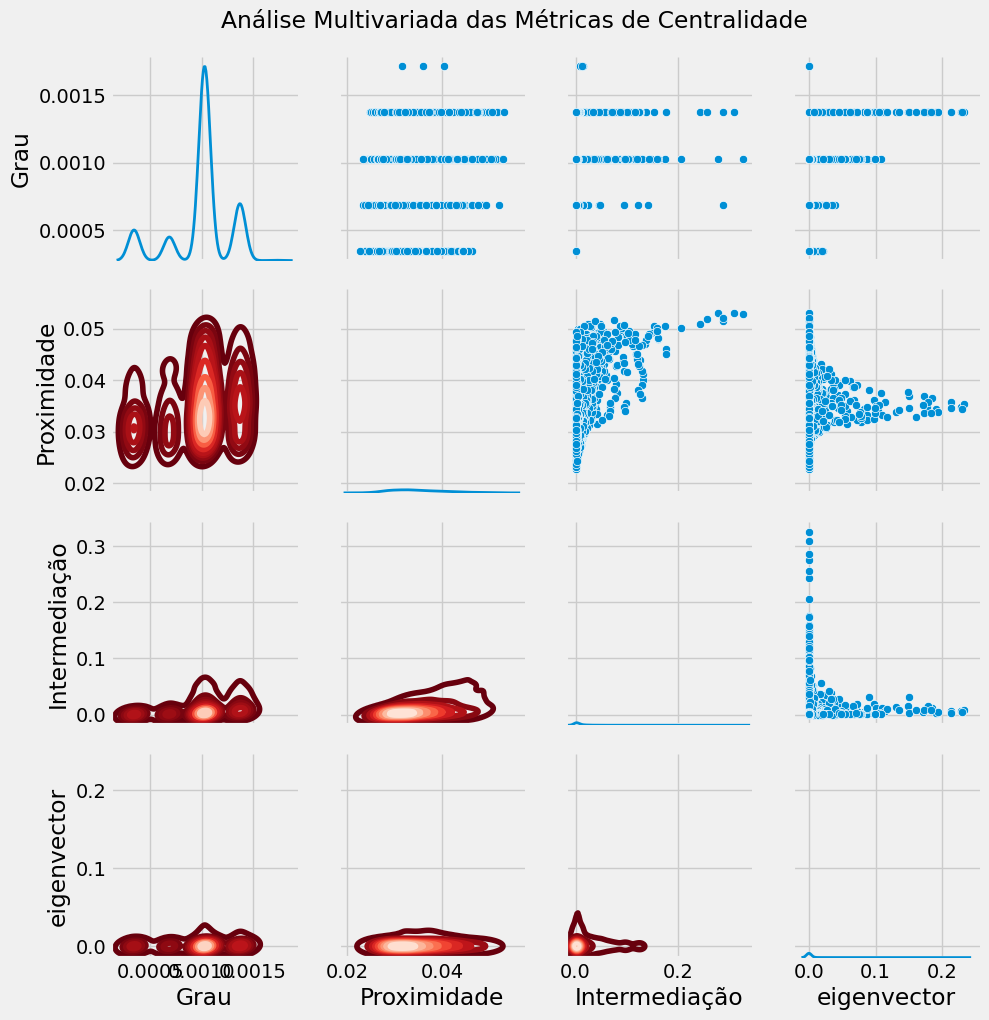

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criar um DataFrame com as métricas de centralidade
centrality_data = {
    'Grau': [degree_centrality[node] for node in G_simple.nodes()],
    'Proximidade': [closeness_centrality[node] for node in G_simple.nodes()],
    'Intermediação': [betweenness_centrality[node] for node in G_simple.nodes()],
}

if 'eigenvector_centrality' in locals():
    centrality_data['eigenvector'] = [eigenvector_centrality[node] for node in G_simple.nodes()]

# Criar o DataFrame
df = pd.DataFrame(centrality_data)

# 2. Análise multivariada com PairGrid
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)  # Plota scatterplot na parte superior
fig.map_lower(sns.kdeplot, cmap="Reds_r")  # Plota KDE na parte inferior
fig.map_diag(sns.kdeplot, lw=2, legend=False)  # Plota KDE na diagonal

plt.suptitle("Análise Multivariada das Métricas de Centralidade", y=1.02)  # Título da figura
plt.show()

## Requisito 4
Quem é o core/shell da rede?

In [ ]:
# Remover laços do grafo
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# shell = 1
# for i in nx.k_shell(G_simple,shell):
#     print(i)

# core = 0
# for i in nx.k_core(G_simple,core):
#     print(i)

print(set([v for k,v in nx.core_number(G_simple).items()]))

core = 2
for i in nx.k_core(G_simple,core):
    print(i)


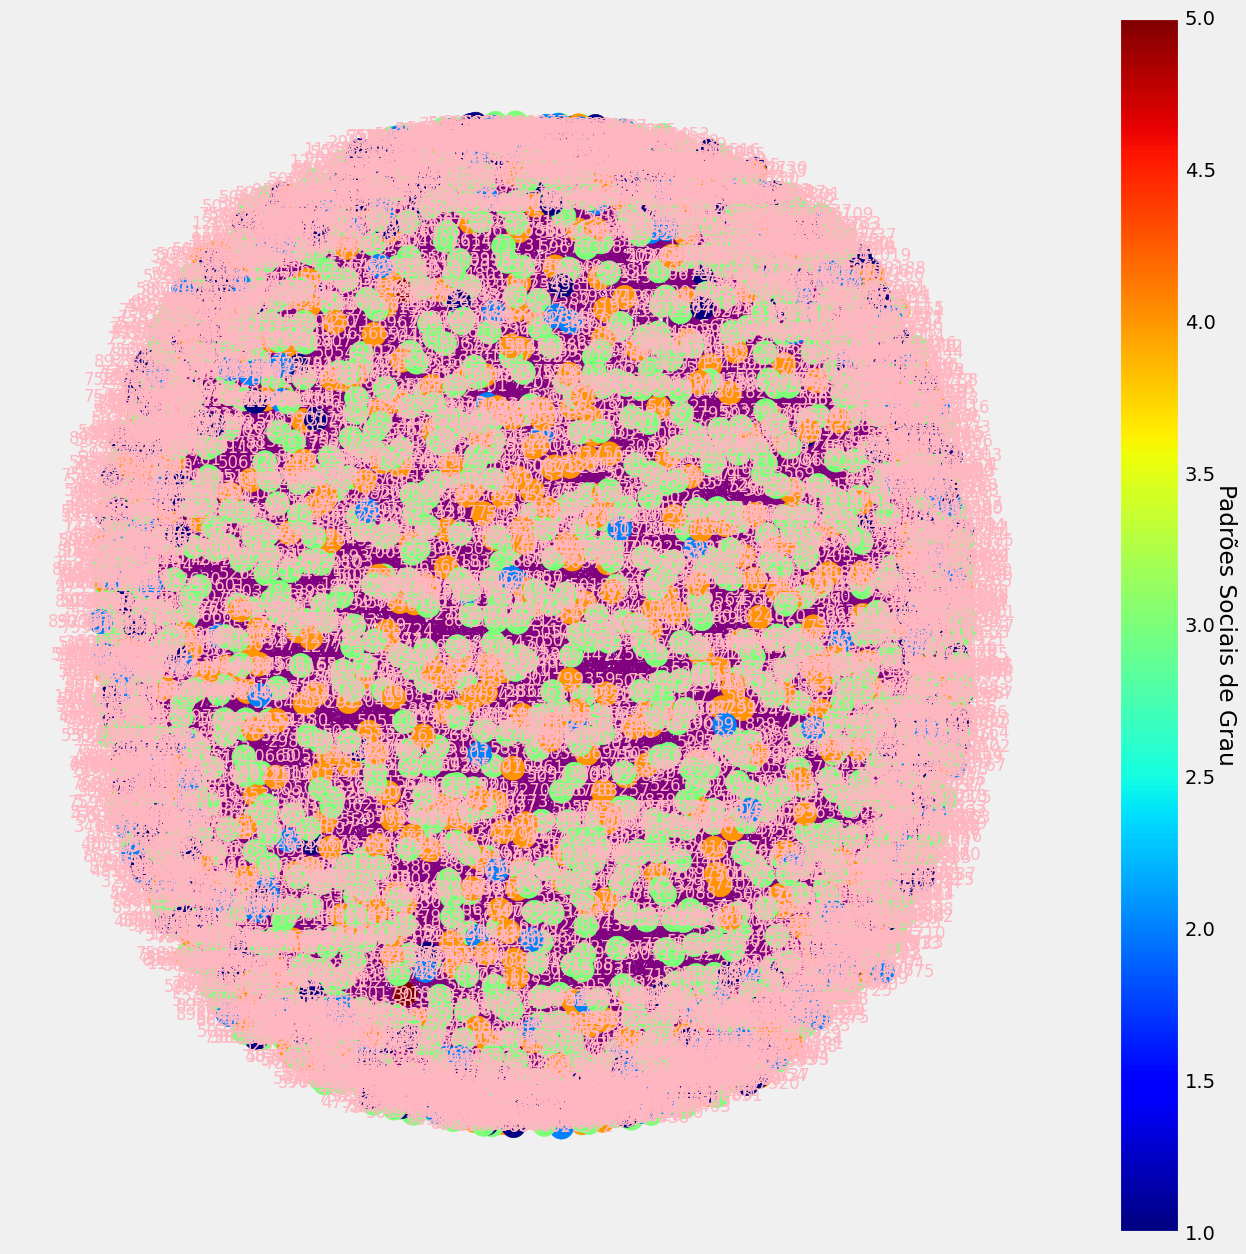

In [ ]:
# O grau da rede
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Layout
pos = nx.spring_layout(G_simple, seed=123456789, k=0.4)

# Cor dos nós
color = list(dict(nx.degree(G_simple)).values())

# Desenho das arestas
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       edge_color='purple', ax=ax)

# Desenho dos nós
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet, ax=ax)

# Desenho dos labels
nx.draw_networkx_labels(G_simple, pos=pos,
                        font_color='lightpink', ax=ax)

# Criando um ScalarMappable para a colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(color), vmax=max(color)))
sm.set_array([])  # Necessário para evitar erros com o ScalarMappable

# Adicionando a barra de cores
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Padrões Sociais de Grau', rotation=270, labelpad=15)


plt.axis("off")
plt.savefig('Padrões_Sociais_de_Grau.png', transparent=True,dpi=600)
plt.show()

In [35]:
# Remover laços do grafo
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# How many k-cores does this network have?
set([v for k,v in nx.core_number(G_simple).items()])

{1, 2}

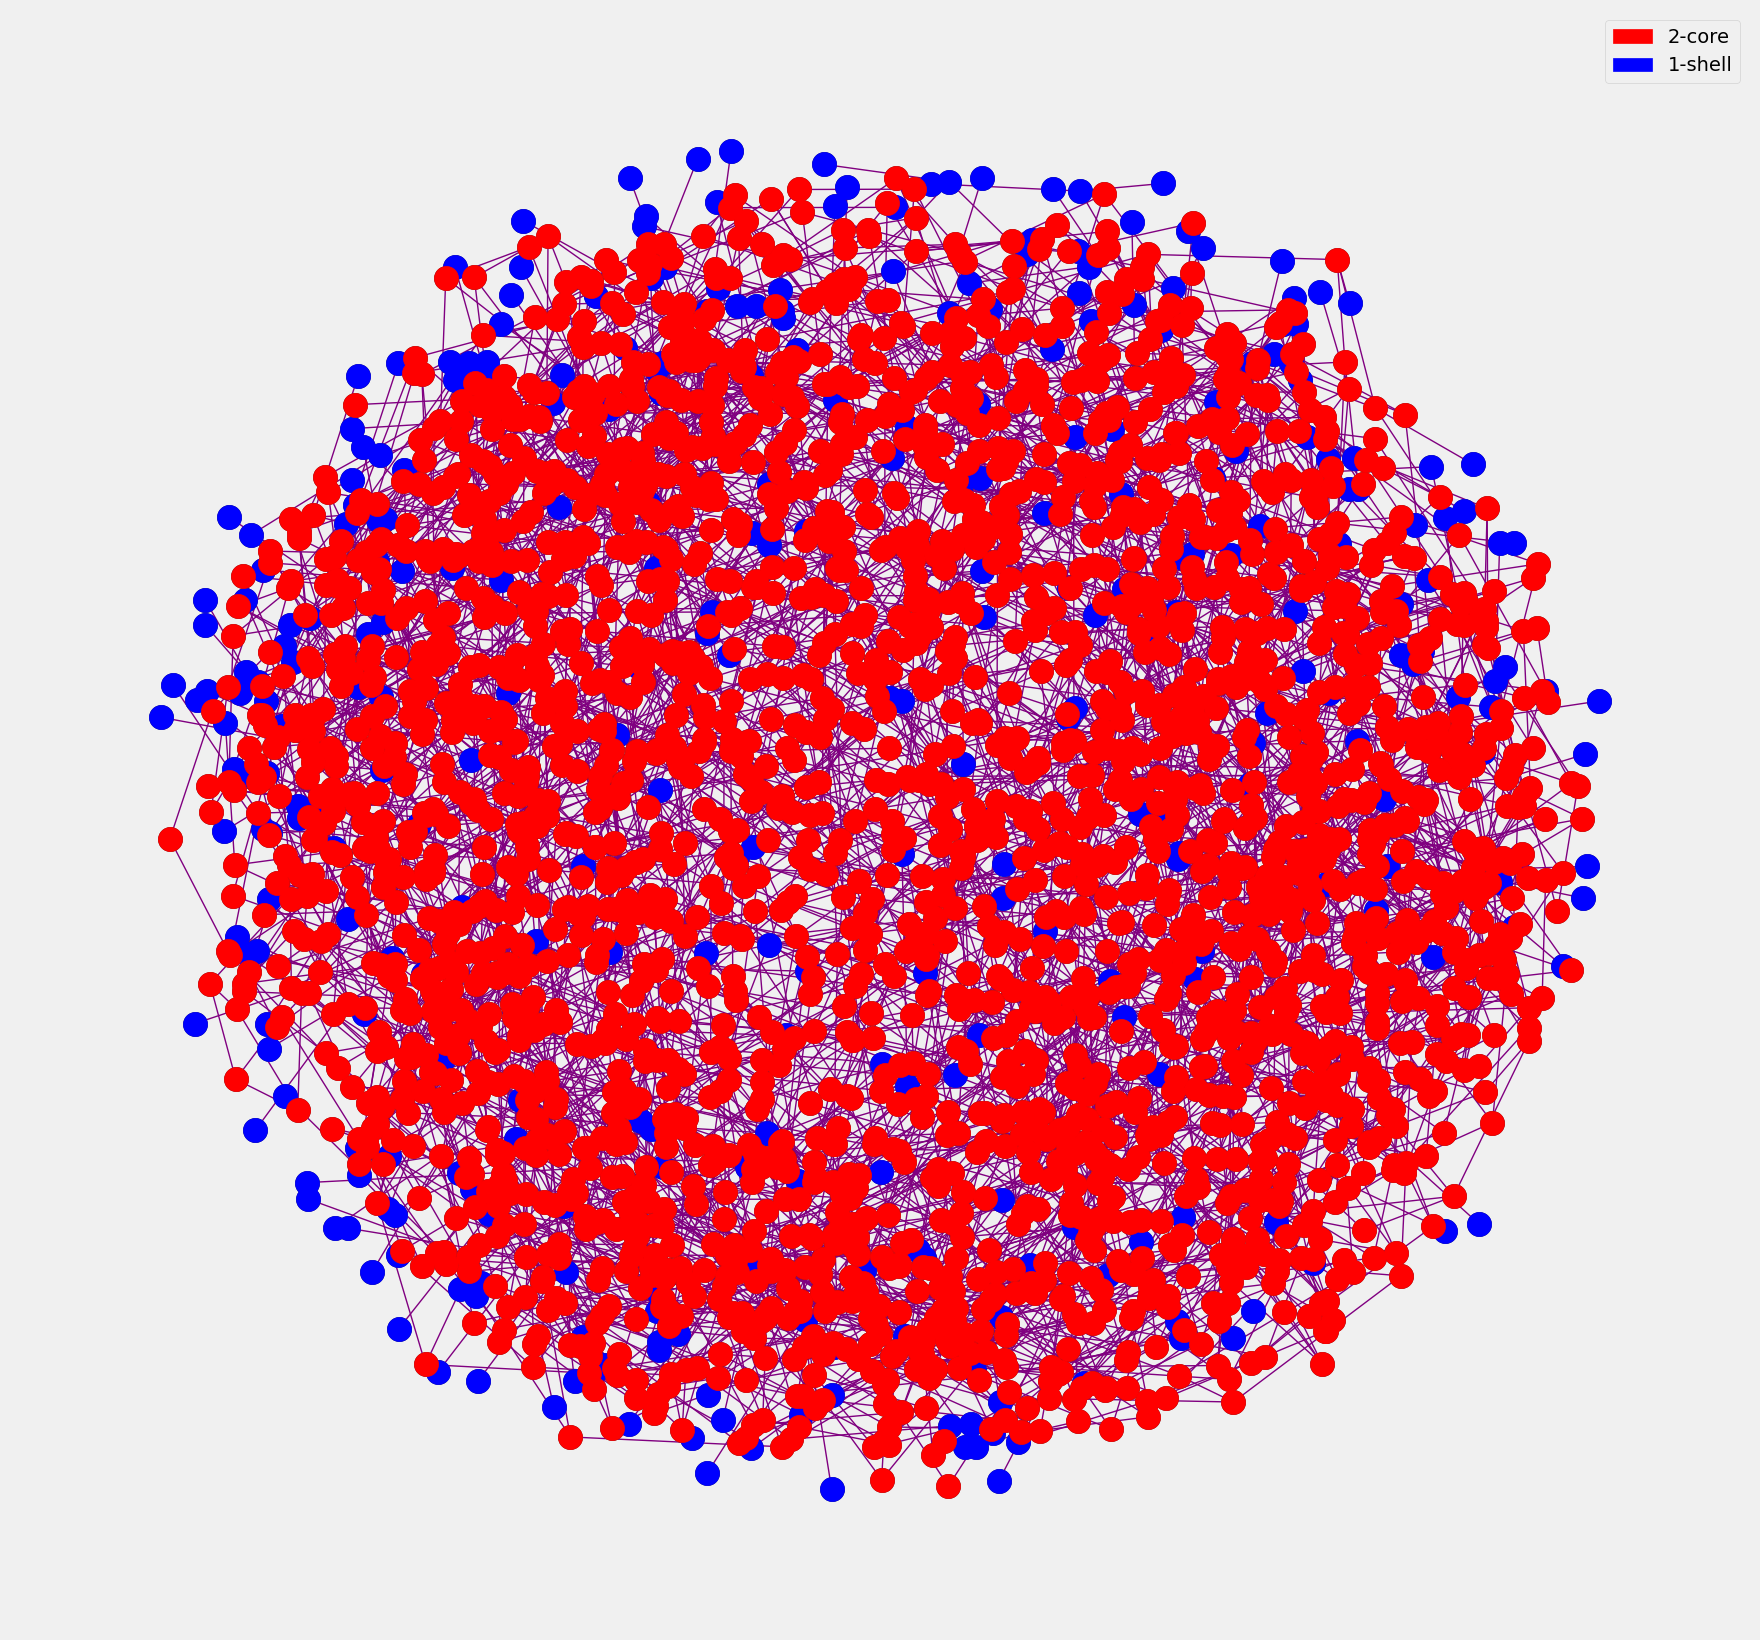

In [36]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(20,20))

# Find k-cores
G_core_1 = nx.k_shell(G_simple, 1)
G_core_2 = nx.k_core(G_simple, 2)

# layout position
pos = nx.spring_layout(G_simple,seed=123456789,k=0.1)

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       edge_color="purple", ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(G_core_1,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(G_core_2,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='2-core')
blue_patch = mpatches.Patch(color='blue', label='1-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('padrões_sociais_de_k-core.png', transparent=True,dpi=600)
plt.show()